0.9955652831872551
0.9933059590628159
0.9822048836100601
0.9396671679300971
0.9977350233999587
0.983702086594307
0.9813987277542214
0.9925071678074855
0.9538709757628345
0.9935406995202672
0.9779230477625437
0.9577990247147683
0.9662745743641465
0.9706587729675888
0.9802982138012768
0.9566241205909034
0.9941395789688554
0.9529001951493379
0.7853002209304658
0.9693001505362473


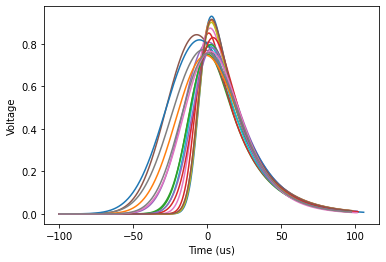

In [24]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.special import expit
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

#ignoring numpy exponential overload error
np.seterr(all='ignore')

def objective(x, b, m, s, l):
    return b*(0.5*l*np.exp(0.5*l*(2*m+l*s*s-2*x))*erfc((m+l*s*s-x)/(np.sqrt(2)*s)))

data_path = '20211104-0002/'
data_files = glob.glob(data_path + '*.csv')
valid_plots = []
ring_downs = []

for i in data_files:
    data = pd.read_csv(i, skiprows=1) 
    #start_full = data.loc[(data['(V)'] == max(data['(V)']))].last_valid_index()
    end = data.loc[(data['(V)']== 0) & (data['(us)'] >= 0)].first_valid_index()
    
    #data2 = data[start_full:end_full]
    
    #need to do 0.9 and 0.1 times the voltage and find the times for those
    
    #start = data2.loc[(data2['(V)'] <= max(data2['(V)'])*0.9)].first_valid_index()
    #end = data2.loc[(data2['(V)'] <= max(data2['(V)'])*0.1)].first_valid_index()

    time = data['(us)']
    time = time[:end]
    voltage = data['(V)']
    voltage = voltage[:end]
    
    popt, pcov = curve_fit(objective, time, voltage)
    
    residuals = voltage - objective(time, *popt)
    res_ss = np.sum(residuals**2)
    ss_tot = np.sum((voltage - np.mean(voltage))**2)
    r_squared = 1 - (res_ss / ss_tot)
    print(r_squared)
    if r_squared > 0.95:
        valid_plots.append(i)

    #ringdown = max(time) - min(time)
    #ring_downs.append(ringdown)
    
    #plt.plot(time, voltage)
        plt.plot(time, objective(time, *popt))
        plt.xlabel('Time (us)')
        plt.ylabel('Voltage')


In [22]:
for i in valid_plots:
    data = pd.read_csv(i, skiprows=1) 
    start_full = data.loc[(data['(V)'] == max(data['(V)']))].last_valid_index()
    end_full = data.loc[(data['(V)']== 0) & (data['(us)'] >= 0)].first_valid_index()
    
    data2 = data[start_full:end_full]
    
    #need to do 0.9 and 0.1 times the voltage and find the times for those
    
    start = data2.loc[(data2['(V)'] <= max(data2['(V)'])*0.9)].first_valid_index()
    end = data2.loc[(data2['(V)'] <= max(data2['(V)'])*0.1)].first_valid_index()

    time = data['(us)']
    time = time[start:end]

    ringdown = max(time) - min(time)
    ring_downs.append(ringdown)

In [23]:
print(len(ring_downs))
print(np.mean(ring_downs))
print(np.std(ring_downs))

18
51.40944299111112
2.897493149063112
